## Prerequisites

In [1]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import importlib
from datetime import datetime, timedelta
import torch.optim as optim
import pandas as pd
from CompustatExtractor import CompustatExtractor
from MergeProcessor import RatingProcessor
import matplotlib.pyplot as plt

is_on_colab = False
import warnings
warnings.filterwarnings("ignore")

In [2]:
import Hypers
importlib.reload(Hypers)
import utils
importlib.reload(utils)
import Trainer
importlib.reload(Trainer)
import Inferencer
importlib.reload(Inferencer)

utils.fix_random_seed(Hypers.Config.seed)

if is_on_colab:
  Hypers.Config.base_path = os.getcwd()
  Hypers.Config.data_path = os.path.join(Hypers.Config.base_path, "data")
  Hypers.Config.model_path = os.path.join(Hypers.Config.base_path, "model")
  Hypers.Config.log_path = os.path.join(Hypers.Config.base_path, "log")
  Hypers.Config.US_data_path = os.path.join(Hypers.Config.data_path, "US_data")

print(f"{Hypers.Config.base_path=}")
print(f"{Hypers.Config.data_path=}")
print(f"{Hypers.Config.model_path=}")
print(f"{Hypers.Config.log_path=}")
print(f"{Hypers.Config.US_data_path=}")

Hypers.Config.base_path='d:\\Document\\Ucla-doc\\263\\project\\PNC_Capstone'
Hypers.Config.data_path='d:\\Document\\Ucla-doc\\263\\project\\PNC_Capstone\\data'
Hypers.Config.model_path='d:\\Document\\Ucla-doc\\263\\project\\PNC_Capstone\\model'
Hypers.Config.log_path='d:\\Document\\Ucla-doc\\263\\project\\PNC_Capstone\\log'
Hypers.Config.US_data_path='d:\\Document\\Ucla-doc\\263\\project\\PNC_Capstone\\data\\US_data'


In [3]:
suffix = "LSTM_Ret"

## Load data & Data Preprocessing

In [4]:
features_path = os.path.join(Hypers.Config.data_path, "WRDS", "features_Ret.csv")
ratings_path =  os.path.join(Hypers.Config.data_path, "WRDS", "ratings_Ret.csv")

In [5]:
import itertools

preprocessing_options1 = [
    {"standardize": 'std', "add_cpi": True, "add_diff": False, 'balance_trend': False, 'balance_label': False},
    {"standardize": 'std', "add_cpi": True, "add_diff": True, 'balance_trend': False, 'balance_label': False},
    {"standardize": 'std', "add_cpi": True, "add_diff": True, 'balance_trend': False, 'balance_label': True},
]


architecture_options = [
    {"dropout": 0.2, "batch_norm": True, "num_conv_layers": 2},
    {"dropout": 0.2, "batch_norm": True, "num_conv_layers": 1},
    {"dropout": 0.2, "batch_norm": False, "num_conv_layers": 2},
    {"dropout": 0.0, "batch_norm": True, "num_conv_layers": 2},
    {"dropout": 0.0, "batch_norm": False, "num_conv_layers": 2},
    {"dropout": 0.0, "batch_norm": False, "num_conv_layers": 1},
    
]


## Training

In [6]:
import LSTMDataset
importlib.reload(LSTMDataset)
import LSTMModel
importlib.reload(LSTMModel)

model_type = "Lstm"

input_dict: 924
output_dict: 392
merged_dict: 342
266 76
max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': False, 'balance_trend': False, 'balance_label': False} {'dropout': 0.2, 'batch_norm': True, 'num_conv_layers': 2}
The model structure is:  LSTMModel(
  (lstm): LSTM(24, 4, num_layers=2, batch_first=True)
  (batch_norm): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [02:06<00:00,  1.58it/s, Loss: 0.007]


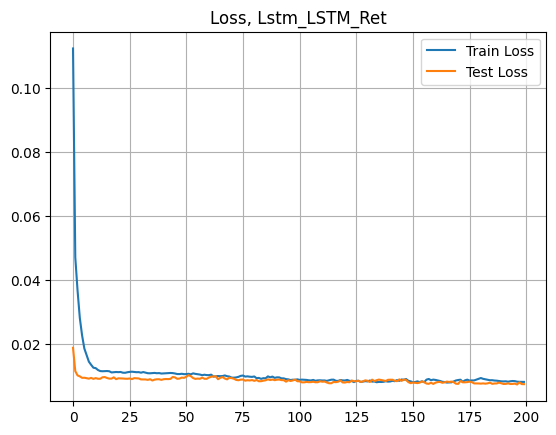

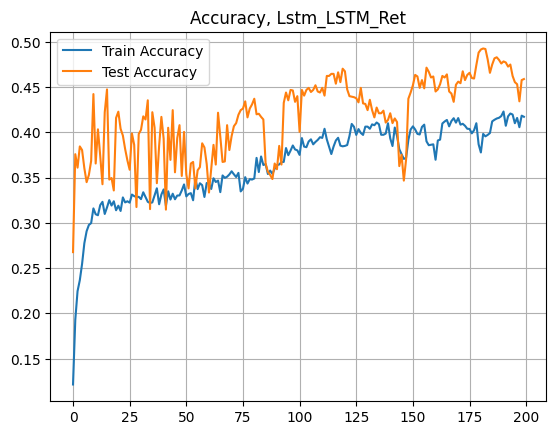

Plot Inference
pred: tensor([4., 4., 4., 4., 4., 4., 4., 4., 4., 4.], device='cuda:0')
truths: tensor([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5., 10., 10.], device='cuda:0')
diff_counter: Counter({1.0: 823, 0.0: 802, 2.0: 115, 6.0: 8})
total_count=1748


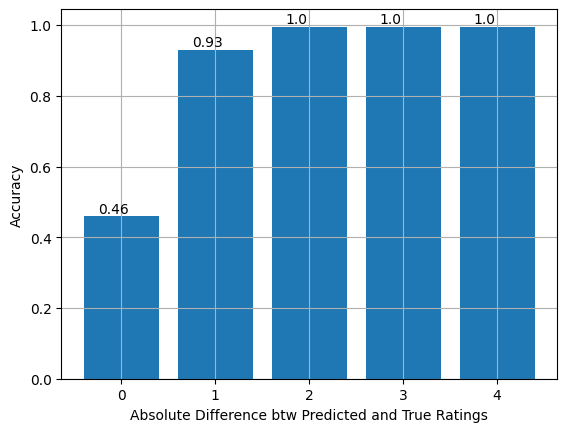

max_seq_len=1
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': False, 'balance_trend': False, 'balance_label': False} {'dropout': 0.2, 'batch_norm': True, 'num_conv_layers': 1}
The model structure is:  LSTMModel(
  (lstm): LSTM(24, 4, batch_first=True)
  (batch_norm): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:10<00:00,  2.83it/s, Loss: 0.009]


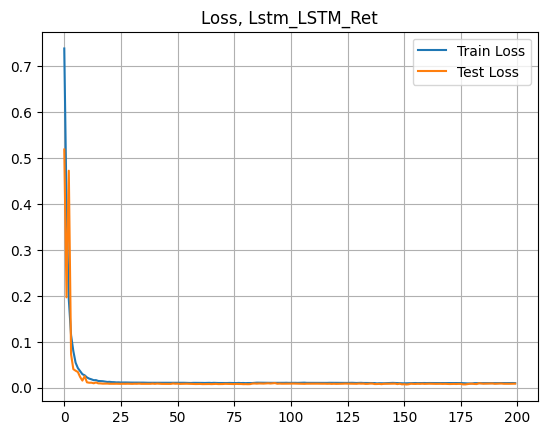

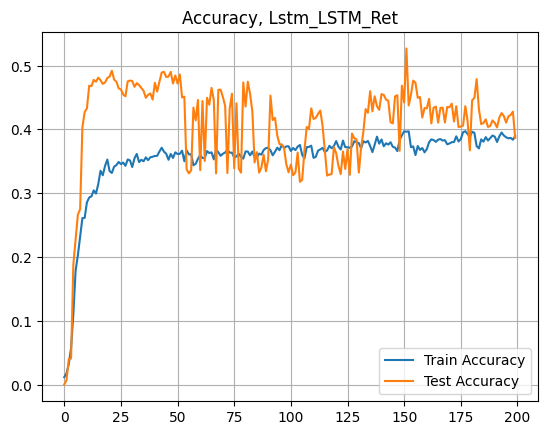

Plot Inference
pred: tensor([4., 4., 4., 4., 4., 4., 4., 4., 4., 5.], device='cuda:0')
truths: tensor([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5., 10., 10.], device='cuda:0')
diff_counter: Counter({1.0: 894, 0.0: 676, 2.0: 160, 3.0: 9, 5.0: 6, 6.0: 2, 4.0: 1})
total_count=1748


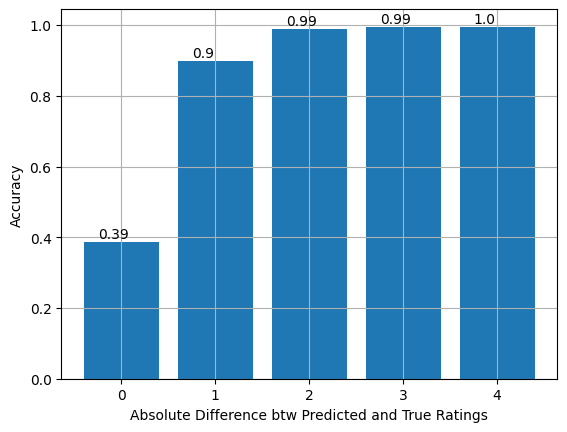

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': False, 'balance_trend': False, 'balance_label': False} {'dropout': 0.2, 'batch_norm': False, 'num_conv_layers': 2}
The model structure is:  LSTMModel(
  (lstm): LSTM(24, 4, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:07<00:00,  2.96it/s, Loss: 0.009]


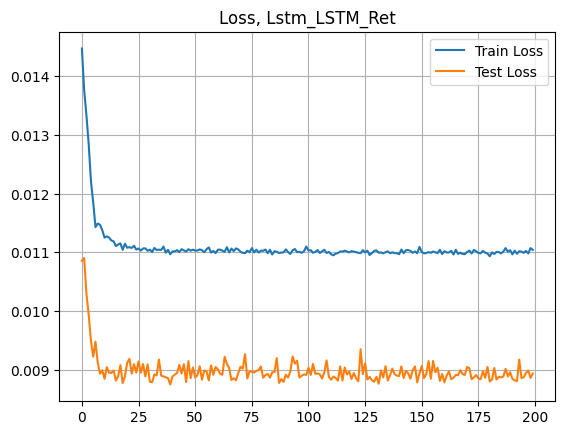

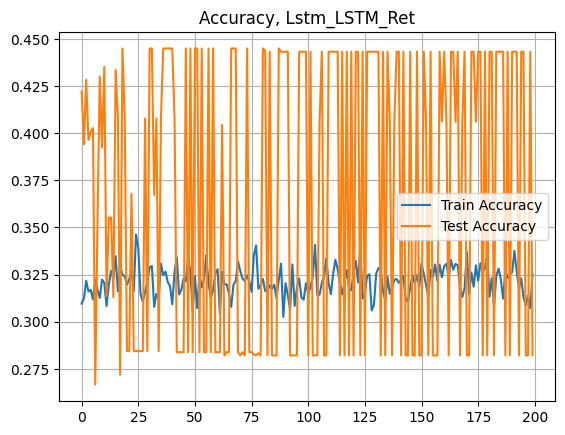

Plot Inference
pred: tensor([4., 4., 4., 4., 4., 4., 4., 4., 4., 4.], device='cuda:0')
truths: tensor([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5., 10., 10.], device='cuda:0')
diff_counter: Counter({1.0: 946, 0.0: 493, 2.0: 273, 3.0: 28, 6.0: 8})
total_count=1748


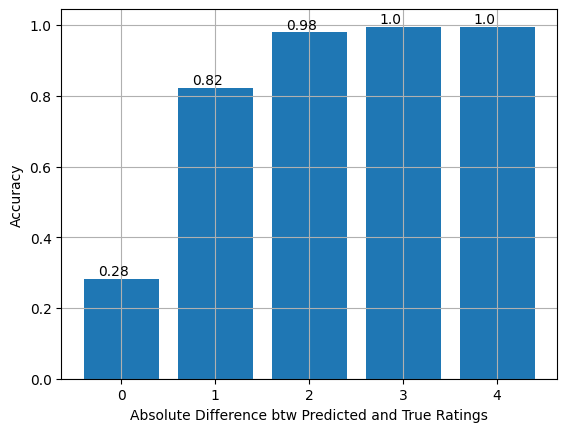

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': False, 'balance_trend': False, 'balance_label': False} {'dropout': 0.0, 'batch_norm': True, 'num_conv_layers': 2}
The model structure is:  LSTMModel(
  (lstm): LSTM(24, 4, num_layers=2, batch_first=True)
  (batch_norm): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:15<00:00,  2.66it/s, Loss: 0.009]


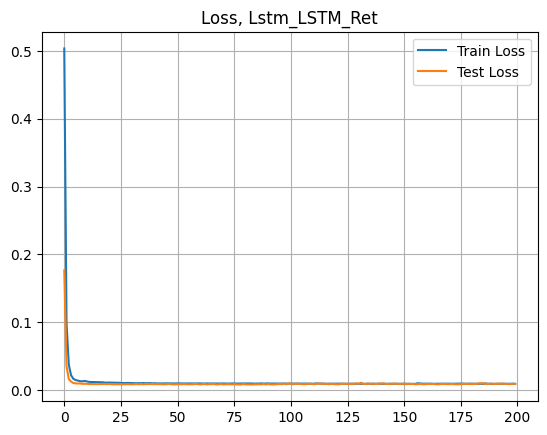

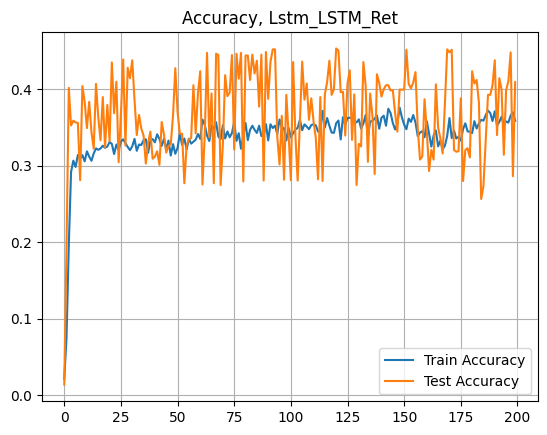

Plot Inference
pred: tensor([3., 3., 3., 4., 3., 3., 3., 3., 4., 3.], device='cuda:0')
truths: tensor([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5., 10., 10.], device='cuda:0')
diff_counter: Counter({1.0: 774, 0.0: 715, 2.0: 234, 3.0: 15, 7.0: 6, 6.0: 2, 5.0: 1, 4.0: 1})
total_count=1748


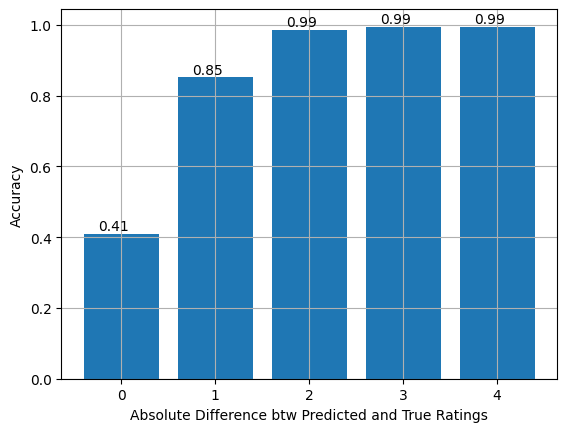

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': False, 'balance_trend': False, 'balance_label': False} {'dropout': 0.0, 'batch_norm': False, 'num_conv_layers': 2}
The model structure is:  LSTMModel(
  (lstm): LSTM(24, 4, num_layers=2, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:09<00:00,  2.89it/s, Loss: 0.007]


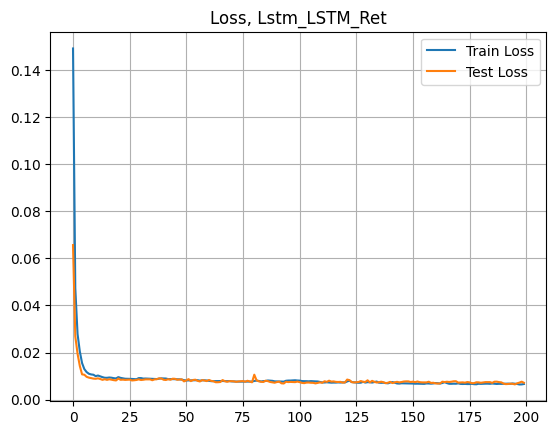

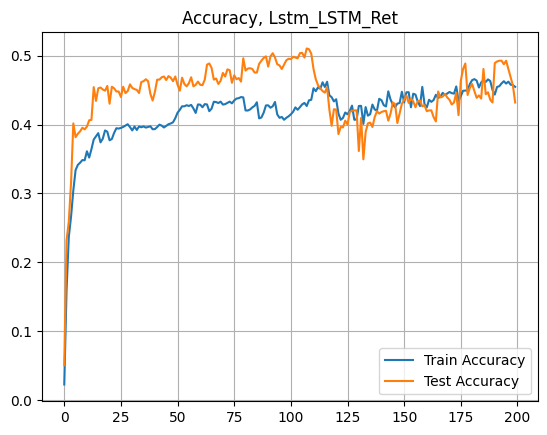

Plot Inference
pred: tensor([4., 4., 4., 4., 4., 4., 4., 4., 4., 4.], device='cuda:0')
truths: tensor([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5., 10., 10.], device='cuda:0')
diff_counter: Counter({1.0: 842, 0.0: 755, 2.0: 143, 6.0: 8})
total_count=1748


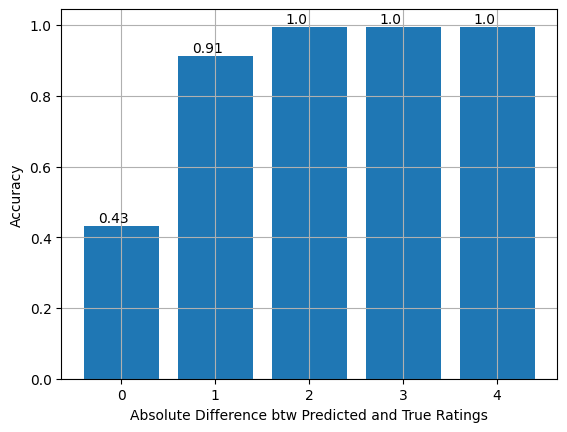

max_seq_len=1
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': False, 'balance_trend': False, 'balance_label': False} {'dropout': 0.0, 'batch_norm': False, 'num_conv_layers': 1}
The model structure is:  LSTMModel(
  (lstm): LSTM(24, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:07<00:00,  2.94it/s, Loss: 0.007]


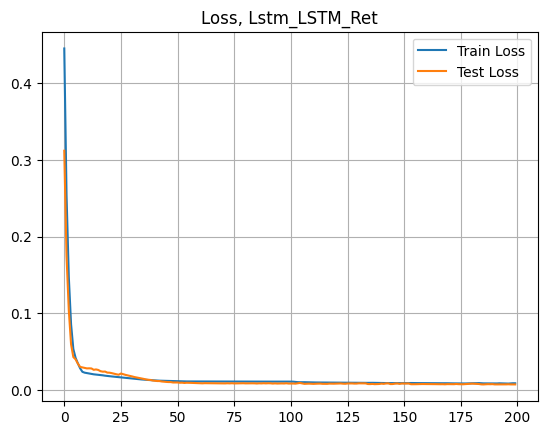

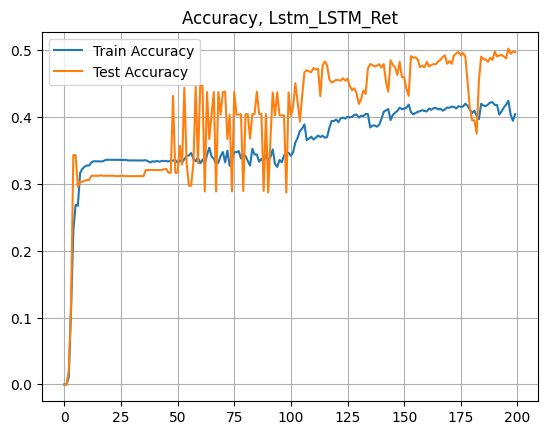

Plot Inference
pred: tensor([4., 4., 4., 4., 4., 4., 4., 4., 4., 4.], device='cuda:0')
truths: tensor([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5., 10., 10.], device='cuda:0')
diff_counter: Counter({0.0: 869, 1.0: 766, 2.0: 105, 6.0: 8})
total_count=1748


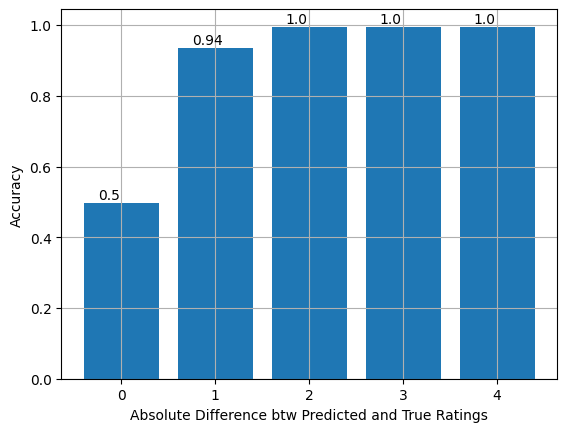

input_dict: 924
output_dict: 392
merged_dict: 342
260 82
max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': False} {'dropout': 0.2, 'batch_norm': True, 'num_conv_layers': 2}
The model structure is:  LSTMModel(
  (lstm): LSTM(38, 4, num_layers=2, batch_first=True)
  (batch_norm): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:17<00:00,  2.57it/s, Loss: 0.009]


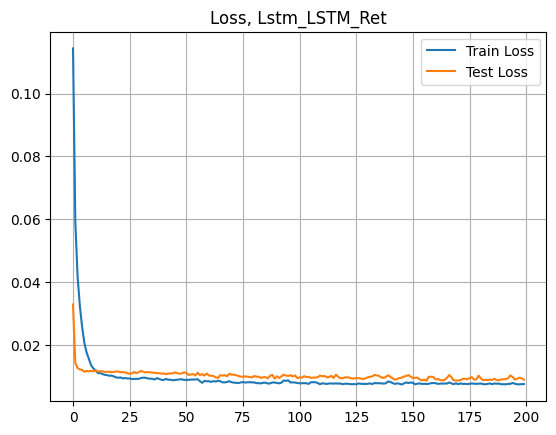

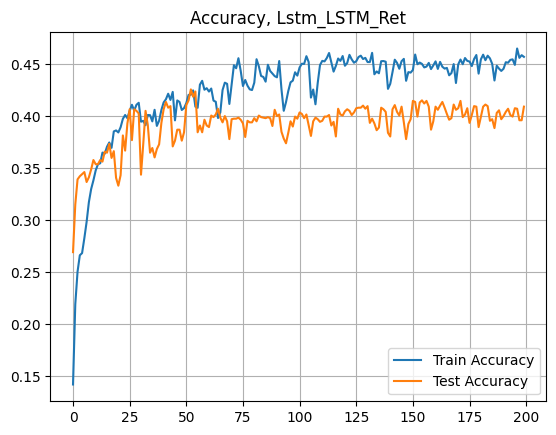

Plot Inference
pred: tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
truths: tensor([4., 4., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
diff_counter: Counter({1.0: 1075, 0.0: 812, 2.0: 64, 6.0: 14, 5.0: 13, 3.0: 3, 4.0: 3})
total_count=1984


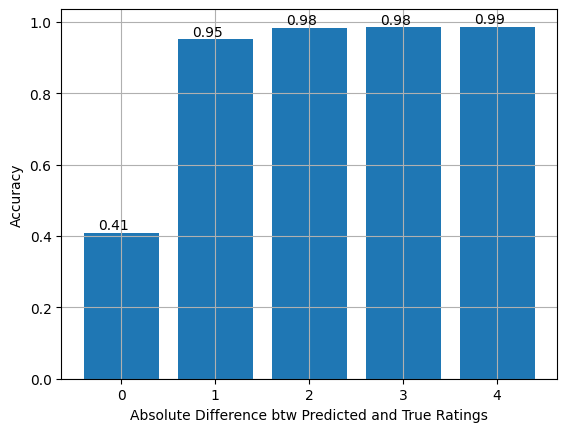

max_seq_len=1
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': False} {'dropout': 0.2, 'batch_norm': True, 'num_conv_layers': 1}
The model structure is:  LSTMModel(
  (lstm): LSTM(38, 4, batch_first=True)
  (batch_norm): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:10<00:00,  2.84it/s, Loss: 0.009]


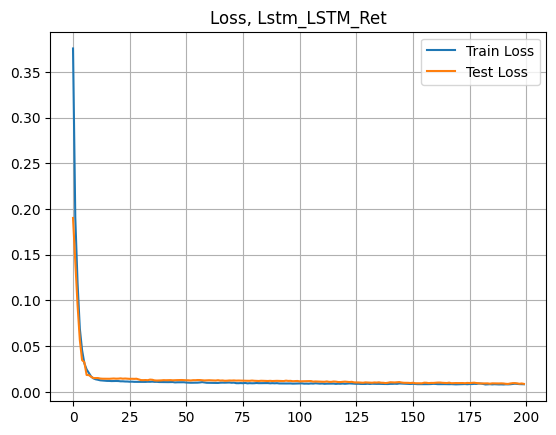

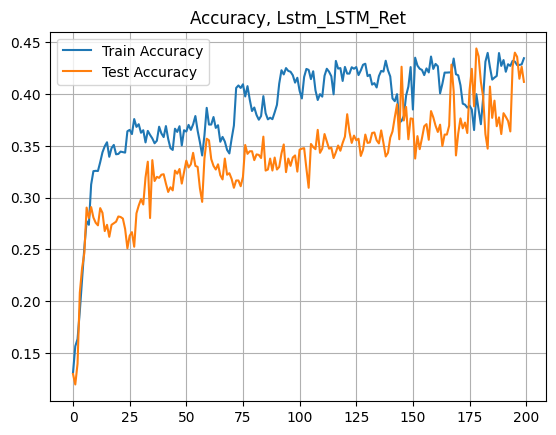

Plot Inference
pred: tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
truths: tensor([4., 4., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
diff_counter: Counter({1.0: 1051, 0.0: 817, 2.0: 83, 5.0: 23, 4.0: 5, 3.0: 3, 6.0: 2})
total_count=1984


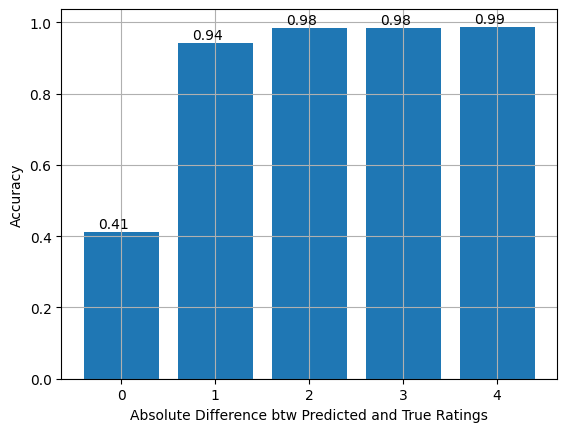

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': False} {'dropout': 0.2, 'batch_norm': False, 'num_conv_layers': 2}
The model structure is:  LSTMModel(
  (lstm): LSTM(38, 4, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:07<00:00,  2.96it/s, Loss: 0.012]


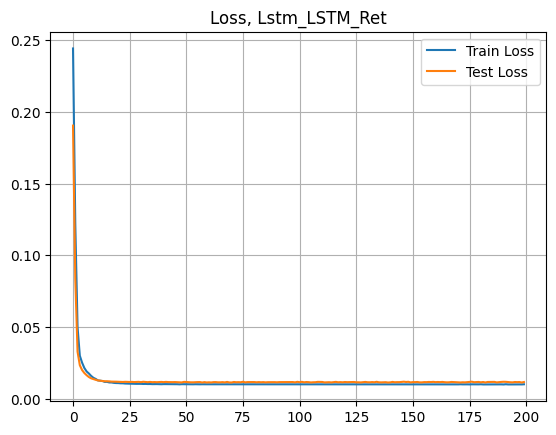

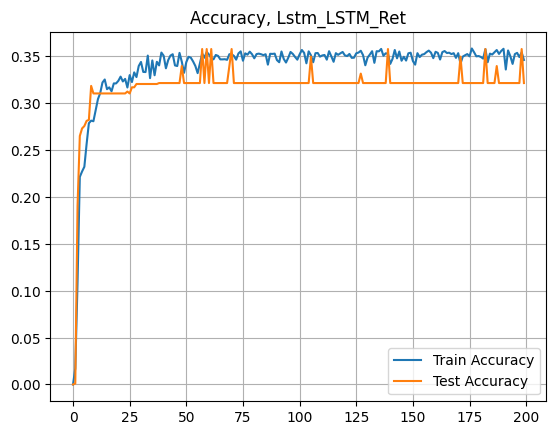

Plot Inference
pred: tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
truths: tensor([4., 4., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
diff_counter: Counter({1.0: 980, 0.0: 638, 2.0: 331, 6.0: 28, 3.0: 5, 7.0: 2})
total_count=1984


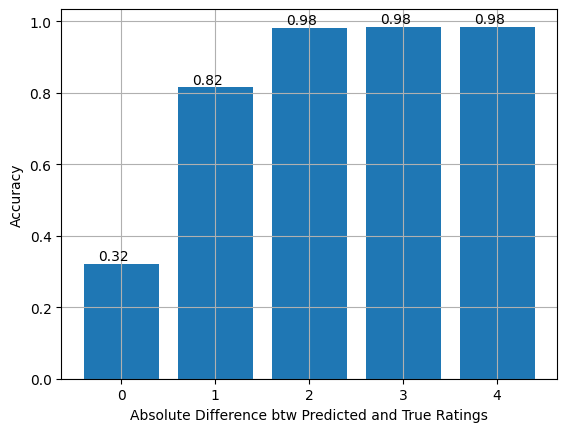

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': False} {'dropout': 0.0, 'batch_norm': True, 'num_conv_layers': 2}
The model structure is:  LSTMModel(
  (lstm): LSTM(38, 4, num_layers=2, batch_first=True)
  (batch_norm): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:14<00:00,  2.67it/s, Loss: 0.009]


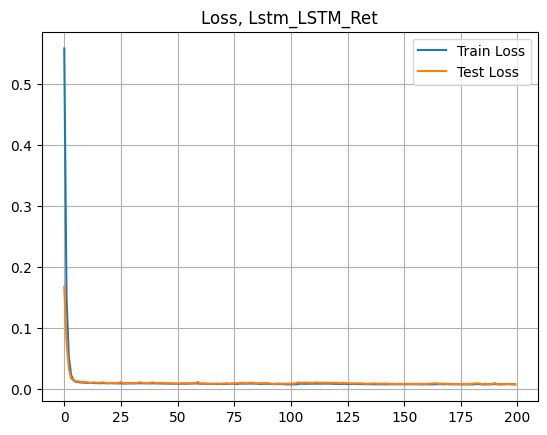

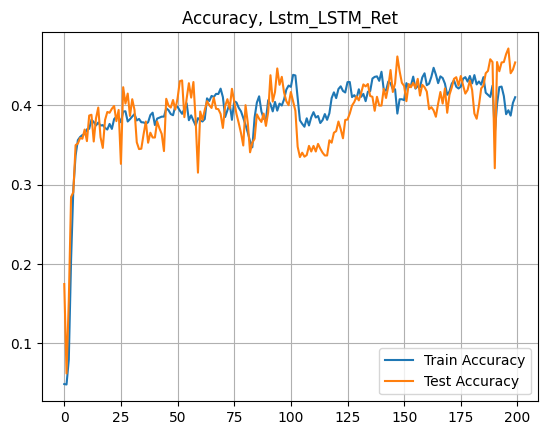

Plot Inference
pred: tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
truths: tensor([4., 4., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
diff_counter: Counter({1.0: 998, 0.0: 901, 2.0: 55, 5.0: 28, 6.0: 2})
total_count=1984


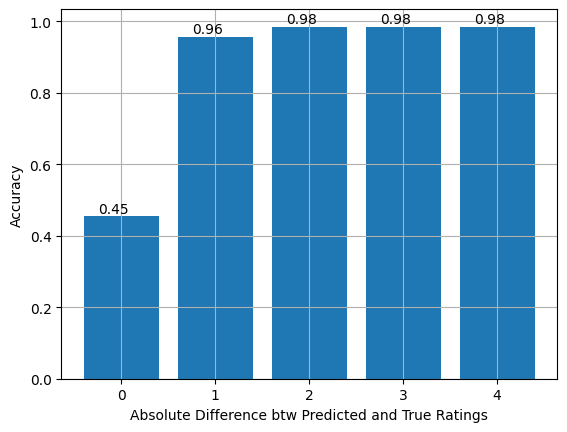

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': False} {'dropout': 0.0, 'batch_norm': False, 'num_conv_layers': 2}
The model structure is:  LSTMModel(
  (lstm): LSTM(38, 4, num_layers=2, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:08<00:00,  2.90it/s, Loss: 0.010]


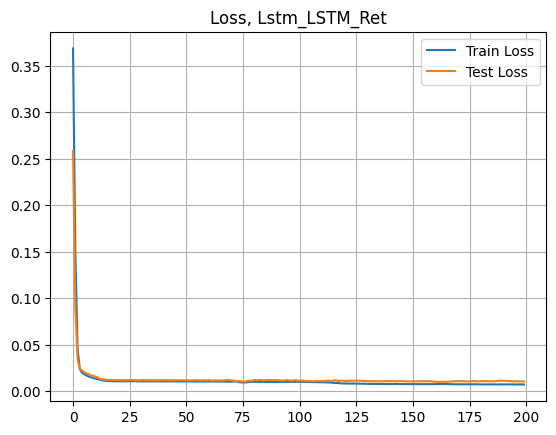

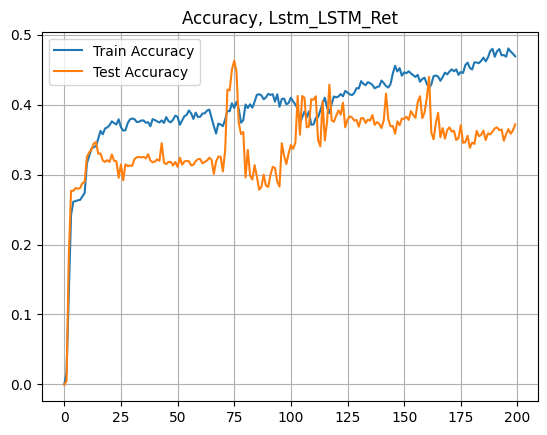

Plot Inference
pred: tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
truths: tensor([4., 4., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
diff_counter: Counter({1.0: 1017, 0.0: 737, 2.0: 193, 6.0: 18, 5.0: 10, 3.0: 7, 4.0: 2})
total_count=1984


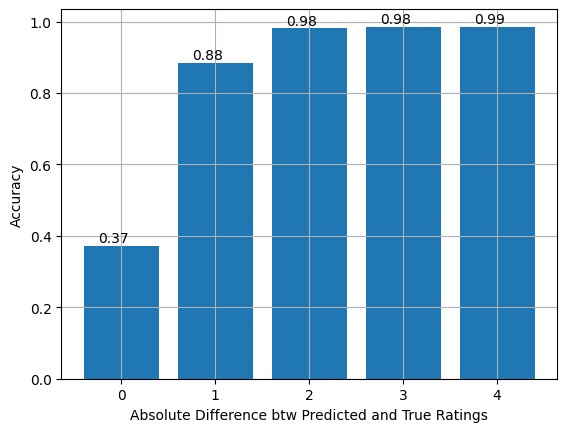

max_seq_len=1
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': False} {'dropout': 0.0, 'batch_norm': False, 'num_conv_layers': 1}
The model structure is:  LSTMModel(
  (lstm): LSTM(38, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:05<00:00,  3.05it/s, Loss: 0.010]


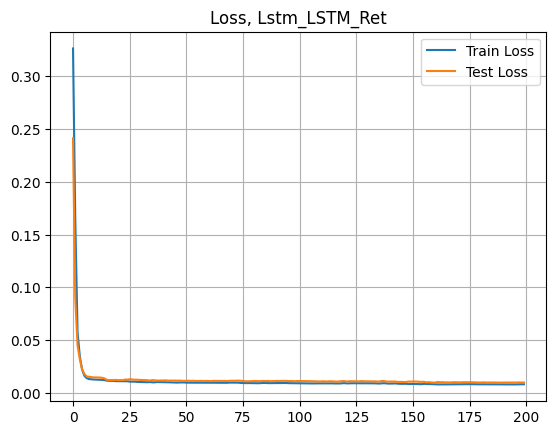

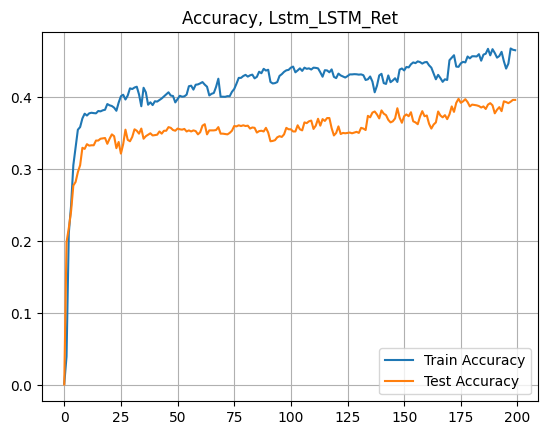

Plot Inference
pred: tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
truths: tensor([4., 4., 3., 3., 3., 3., 3., 3., 3., 3.], device='cuda:0')
diff_counter: Counter({1.0: 1001, 0.0: 786, 2.0: 165, 5.0: 26, 3.0: 2, 7.0: 2, 4.0: 2})
total_count=1984


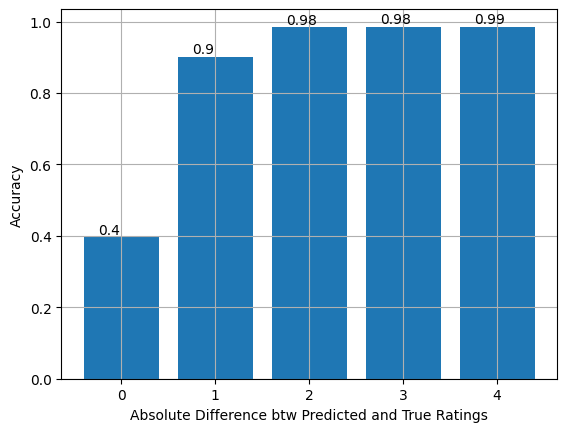

input_dict: 924
output_dict: 392
merged_dict: 342
The number of each labels: {4.0: 1276, 3.0: 1275}
201 62
max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': True} {'dropout': 0.2, 'batch_norm': True, 'num_conv_layers': 2}
The model structure is:  LSTMModel(
  (lstm): LSTM(38, 4, num_layers=2, batch_first=True)
  (batch_norm): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [00:59<00:00,  3.35it/s, Loss: 0.009]


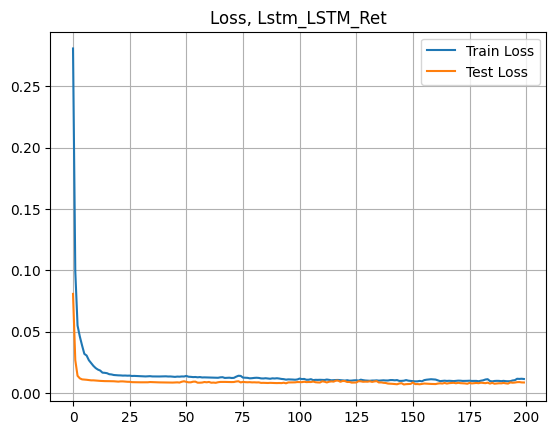

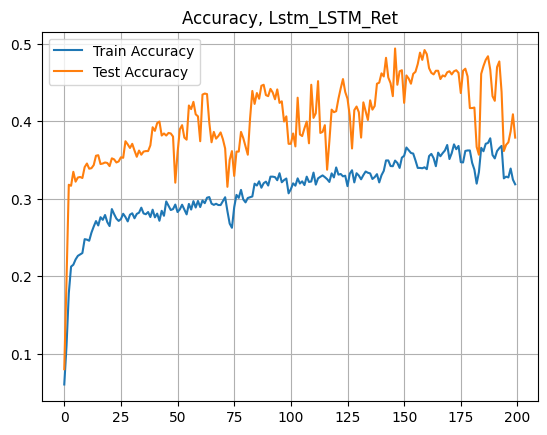

Plot Inference
pred: tensor([4., 4., 4., 4., 4., 4., 4., 4., 4., 3.], device='cuda:0')
truths: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
diff_counter: Counter({1.0: 789, 0.0: 567, 2.0: 115, 3.0: 17, 8.0: 3, 6.0: 3, 7.0: 1, 5.0: 1})
total_count=1496


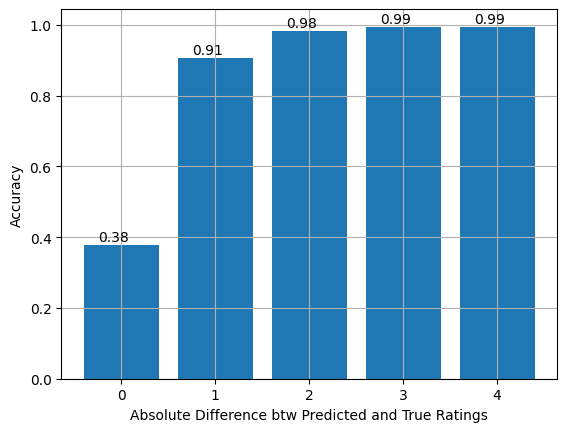

max_seq_len=1
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': True} {'dropout': 0.2, 'batch_norm': True, 'num_conv_layers': 1}
The model structure is:  LSTMModel(
  (lstm): LSTM(38, 4, batch_first=True)
  (batch_norm): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [00:57<00:00,  3.49it/s, Loss: 0.009]


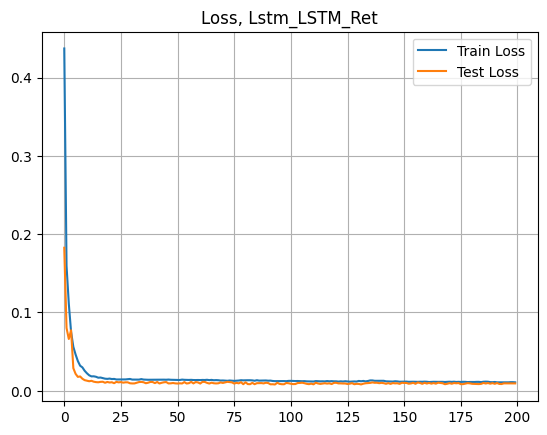

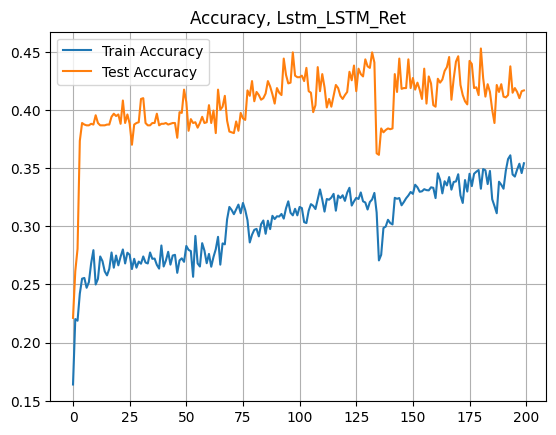

Plot Inference
pred: tensor([4., 4., 4., 4., 4., 4., 4., 4., 4., 4.], device='cuda:0')
truths: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
diff_counter: Counter({1.0: 700, 0.0: 624, 2.0: 159, 3.0: 6, 7.0: 4, 6.0: 3})
total_count=1496


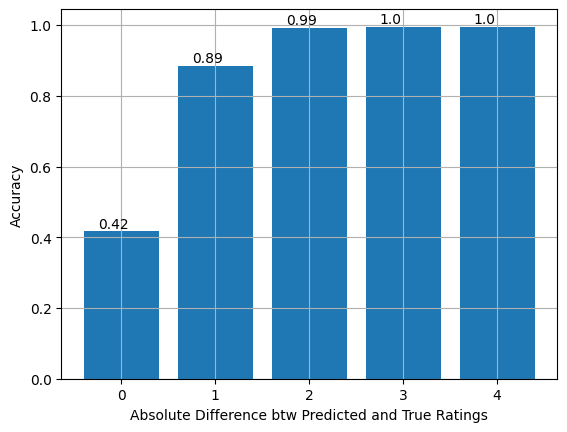

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': True} {'dropout': 0.2, 'batch_norm': False, 'num_conv_layers': 2}
The model structure is:  LSTMModel(
  (lstm): LSTM(38, 4, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [00:53<00:00,  3.72it/s, Loss: 0.007]


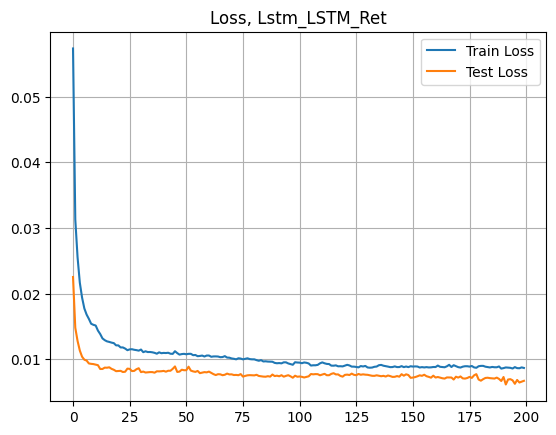

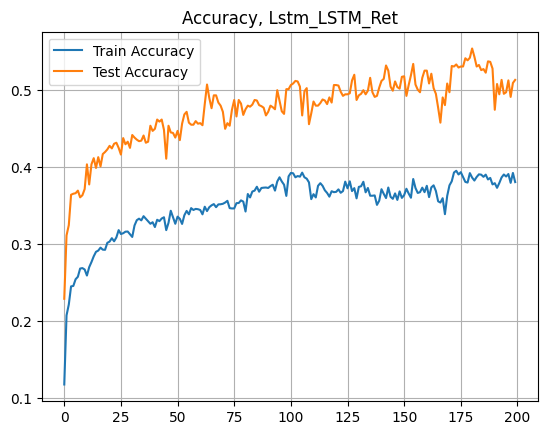

Plot Inference
pred: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
truths: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
diff_counter: Counter({0.0: 768, 1.0: 626, 2.0: 94, 7.0: 3, 5.0: 3, 3.0: 1, 6.0: 1})
total_count=1496


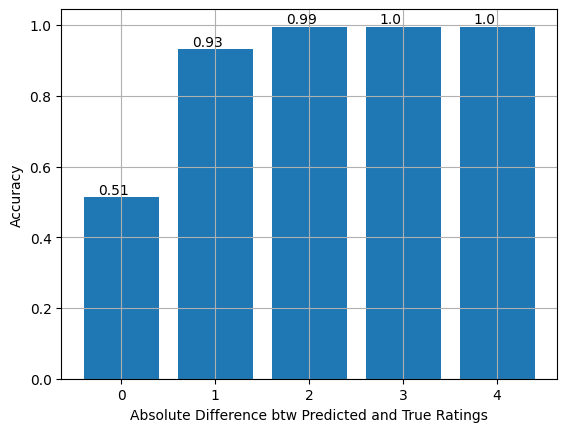

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': True} {'dropout': 0.0, 'batch_norm': True, 'num_conv_layers': 2}
The model structure is:  LSTMModel(
  (lstm): LSTM(38, 4, num_layers=2, batch_first=True)
  (batch_norm): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:00<00:00,  3.30it/s, Loss: 0.008]


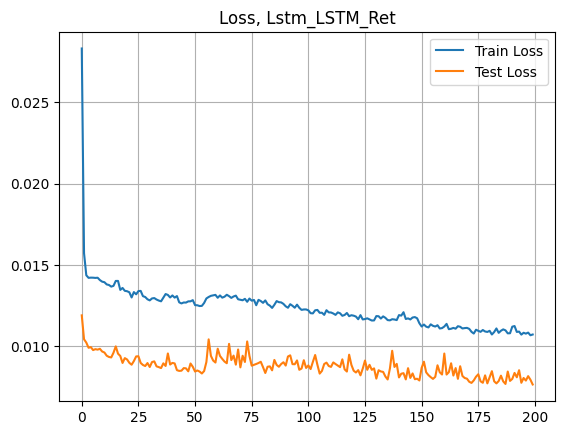

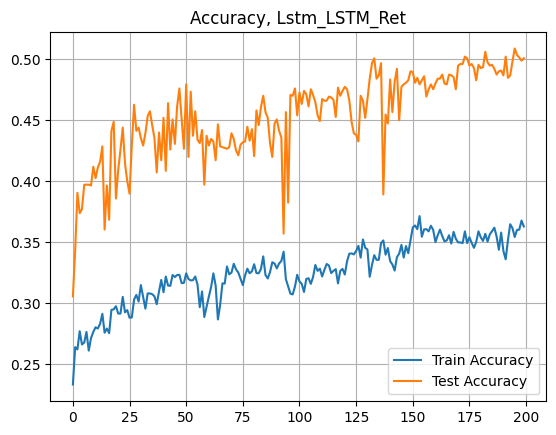

Plot Inference
pred: tensor([4., 5., 5., 5., 4., 5., 5., 5., 4., 4.], device='cuda:0')
truths: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
diff_counter: Counter({0.0: 749, 1.0: 614, 2.0: 121, 6.0: 4, 3.0: 3, 7.0: 3, 5.0: 2})
total_count=1496


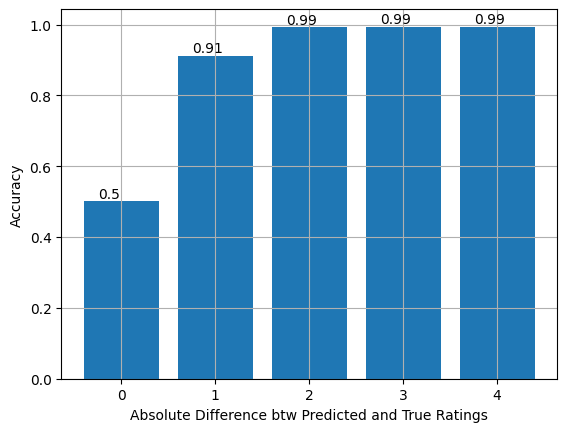

max_seq_len=2
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': True} {'dropout': 0.0, 'batch_norm': False, 'num_conv_layers': 2}
The model structure is:  LSTMModel(
  (lstm): LSTM(38, 4, num_layers=2, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:12<00:00,  2.75it/s, Loss: 0.008]


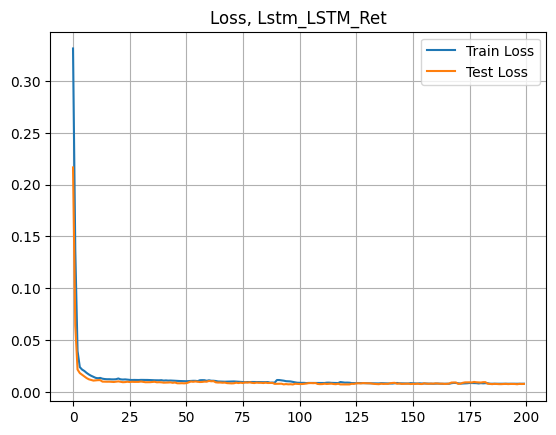

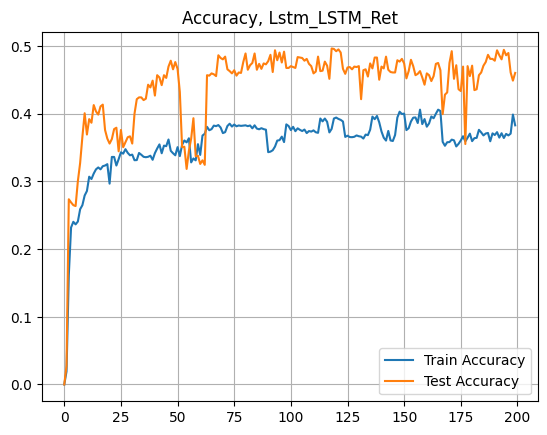

Plot Inference
pred: tensor([4., 4., 4., 4., 4., 4., 4., 4., 4., 4.], device='cuda:0')
truths: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
diff_counter: Counter({1.0: 714, 0.0: 688, 2.0: 83, 6.0: 4, 7.0: 3, 3.0: 3, 4.0: 1})
total_count=1496


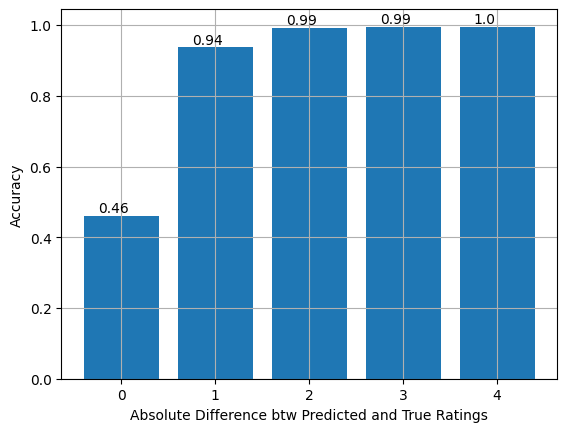

max_seq_len=1
Current seeting is:  {'standardize': 'std', 'add_cpi': True, 'add_diff': True, 'balance_trend': False, 'balance_label': True} {'dropout': 0.0, 'batch_norm': False, 'num_conv_layers': 1}
The model structure is:  LSTMModel(
  (lstm): LSTM(38, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


Vaild Epoch 199: 100%|██████████| 200/200 [01:44<00:00,  1.91it/s, Loss: 0.008]


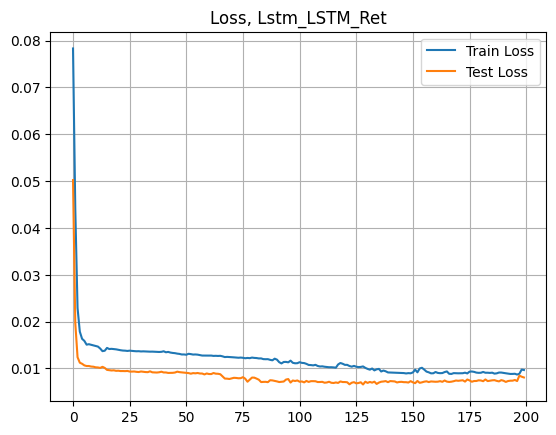

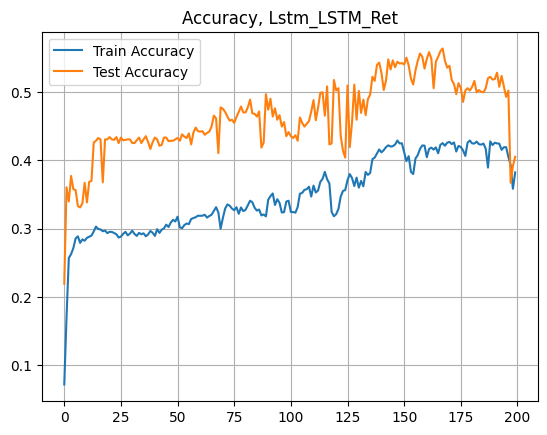

Plot Inference
pred: tensor([4., 5., 5., 5., 4., 5., 5., 5., 4., 5.], device='cuda:0')
truths: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.], device='cuda:0')
diff_counter: Counter({1.0: 721, 0.0: 606, 2.0: 143, 3.0: 15, 4.0: 4, 8.0: 2, 6.0: 2, 5.0: 2, 7.0: 1})
total_count=1496


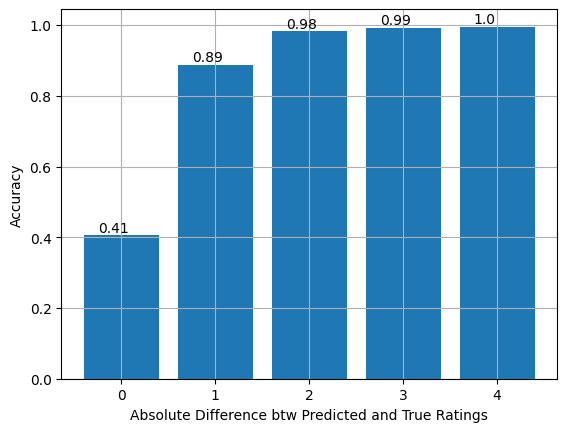

In [7]:
for preprocessing in preprocessing_options1:
    from CompustatExtractor import CompustatExtractor
    importlib.reload(Hypers)
    feature_dict = CompustatExtractor.process_compustat_features(features_path, 
                                                                save=False, 
                                                                add_cpi=preprocessing["add_cpi"], 
                                                                add_diff=preprocessing["add_diff"], 
                                                                norm=preprocessing["standardize"], 
                                                                filestem="feature_Ret_new"
                                                                )
    rating_dict = CompustatExtractor.process_compustat_ratings(ratings_path, 
                                                            save=True, 
                                                            filestem="rating_Ret_new"
                                                            )

    if preprocessing["balance_trend"]:
        processor = RatingProcessor(os.path.join(Hypers.Config.data_path, "rating_Ret_new.pkl"))
        final_ratings= processor.process_ratings('output/ratings_Ret_Processed_std_new.pkl')
        feature  = feature_dict
        all_ratings = rating_dict
        merged_data = utils.merge_input_output_dicts_k(feature, final_ratings, all_ratings, 4, verbose=True)
    else: 
        merged_dict = CompustatExtractor.merge_input_output_dicts(feature_dict, rating_dict)

    if preprocessing["balance_label"]:
        train_dict, test_dict = utils.spilt_train_valid(merged_dict, random_select=True, save=False, suffix=suffix)
        train_dict = utils.balance_train_dict(train_dict,target_count=1300, min_quarters=3, labels_to_balance=[3, 4])
        print(len(train_dict), len(test_dict))
    else:
        train_dict, test_dict = utils.spilt_train_valid(merged_dict, random_select=True, save=False, suffix=suffix)
        print(len(train_dict), len(test_dict))
        
    for architecture in architecture_options:
        max_seq_len = architecture["num_conv_layers"]
        print(f"{max_seq_len=}")
        print("Current seeting is: ", preprocessing, architecture)
        if preprocessing["add_diff"]:
            input_dim = 38
        else:
            input_dim = 24


        model = LSTMModel.LSTMModel(input_size=input_dim,
                                            hidden_size=Hypers.Config.hidden_size,
                                            num_layers=max_seq_len,
                                            batch_norm=architecture["batch_norm"],
                                            dropout=architecture["dropout"],
                                            proj_size=Hypers.Config.proj_size)
        criterion = nn.MSELoss(reduction="sum")
        optimizer = torch.optim.Adam(model.parameters(), lr=Hypers.Config.learning_rate)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.1)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print("The model structure is: ", model)

        train_set, test_set = LSTMDataset.LSTMDataset(train_dict), LSTMDataset.LSTMDataset(test_dict)
        train_loader = DataLoader(train_set, batch_size=Hypers.Config.batch_size, shuffle=True, collate_fn=LSTMDataset.LSTMDataset.custom_collate_fn)
        test_loader = DataLoader(test_set, batch_size=Hypers.Config.batch_size, shuffle=True, collate_fn=LSTMDataset.LSTMDataset.custom_collate_fn)

        trainer = Trainer.Trainer(model, criterion, optimizer, device, train_loader, test_loader, max_seq_len)
        train_loss, train_accuracy, test_loss, test_accuracy = trainer.train_loop()
        utils.plot_graph(train_loss, train_accuracy, test_loss, test_accuracy, identifier=f"{model_type}_{suffix}")

        print("Plot Inference")

        test_loader = DataLoader(test_set, batch_size=Hypers.Config.batch_size, shuffle=False, collate_fn=LSTMDataset.LSTMDataset.custom_collate_fn)
        inferencer = Inferencer.Inferencer(model=model, test_loader=test_loader, device=device)
        predictions, turths, features, accuracy, diff_counter = inferencer.infer()
        nums = 10
        print("pred:", predictions[:nums])
        print("truths:", turths[:nums])
        print("diff_counter:", diff_counter)
        total_count = sum(diff_counter.values())
        print(f"{total_count=}")

        accumulated_count = []

        for i in range(0, 33):
            count = diff_counter[i]
            if i==0:
                accumulated_count.append(count)
                continue
            accumulated_count.append(accumulated_count[-1]+count)

        accumulated_accuracy = [i/total_count for i in accumulated_count]
        accumulated_accuracy[:5]

        plt.bar(range(0,5), accumulated_accuracy[:5])
        for i, v in enumerate(accumulated_accuracy[:5]):
            plt.text(i - 0.25, v + 0.01, str(round(v, 2)))
        plt.xlabel("Absolute Difference btw Predicted and True Ratings")
        plt.ylabel("Accuracy")
        plt.grid()
        plt.show()
            